<a href="https://colab.research.google.com/github/LoneXHuB/Yolov5-PIF6004/blob/main/srng_yolov5_locate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##YOLO V syringe locate

In [1]:
!git clone https://github.com/ultralytics/yolov5  # clone

Cloning into 'yolov5'...
remote: Enumerating objects: 13702, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 13702 (delta 8), reused 10 (delta 4), pack-reused 13683
Receiving objects: 100% (13702/13702), 12.18 MiB | 27.71 MiB/s, done.
Resolving deltas: 100% (9571/9571), done.


In [2]:
!pip install -r yolov5/requirements.txt  # install

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 596 kB 4.1 MB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
!unzip drive/MyDrive/syringe-locate.zip

Archive:  drive/MyDrive/syringe-locate.zip
   creating: syringe-locate/
   creating: syringe-locate/images/
  inflating: syringe-locate/images/PXL_20220209_195129453.MP.jpg  
  inflating: syringe-locate/images/PXL_20220209_195138376.MP.jpg  
  inflating: syringe-locate/images/PXL_20220209_195144677.MP.jpg  
  inflating: syringe-locate/images/PXL_20220209_195210953.jpg  
  inflating: syringe-locate/images/PXL_20220209_195229804.jpg  
  inflating: syringe-locate/images/PXL_20220209_195233719.jpg  
  inflating: syringe-locate/images/PXL_20220209_195237036.jpg  
  inflating: syringe-locate/images/PXL_20220209_195245727.jpg  
  inflating: syringe-locate/images/PXL_20220209_195251684.jpg  
  inflating: syringe-locate/images/PXL_20220209_195254613.jpg  
  inflating: syringe-locate/images/PXL_20220209_195310153.jpg  
  inflating: syringe-locate/images/PXL_20220209_195313660.jpg  
  inflating: syringe-locate/images/PXL_20220209_195317700.jpg  
  inflating: syringe-locate/images/PXL_20220209_195

In [ ]:
!ls

bubble	drive  sample_data  yolov5


In [ ]:
!python yolov5/train.py --img 640 --batch 30 --epochs 200 --data yolo-srng1-locate.yaml --weights yolov5s.pt

train: weights=yolov5s.pt, cfg=, data=yolo-srng1-locate.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=200, batch_size=30, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5/runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (5/5), done.
remote: Total 7 (delta 5), reused 5 (delta 5), pack-reused 2
Unpacking objects: 100% (7/7), done.
From https://github.com/ultralytics/yolov5
   7ff7fc2..8a7f231  test/python_versions -> origin/test/python_versions
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-167-g488fb0a torch 1.

## INFER

In [ ]:
!python yolov5/val.py --weights yolov5/runs/train/exp2/weights/best.pt --data yolo-srng1-locate.yaml --img 640

val: data=yolo-srng1-locate.yaml, weights=['yolov5/runs/train/exp2/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=yolov5/runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v6.1-167-g488fb0a torch 1.11.0+cu113 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model summary: 213 layers, 7023610 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning '/content/syringe-locate/val.cache' images and labels... 0 found, 1 missing, 0 empty, 0 corrupt: 100% 1/1 [00:00<?, ?it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100% 1/1 [00:00<00:00,  3.27it/s]
                 all          1          0          0          0          0          0
Speed: 0.4ms pre-process, 31.1ms inference, 3.7ms NMS per image at shape (32, 3, 640, 640)
Results saved to yolov5/runs/val

In [ ]:
from IPython.display import Image

!python yolov5/detect.py --source "syringe-locate/val/Ensemble seringues.jpg" --weights yolov5/runs/train/exp/weights/best.pt


detect: weights=['yolov5/runs/train/exp/weights/best.pt'], source=syringe-locate/val/Ensemble seringues.jpg, data=yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-167-g488fb0a torch 1.11.0+cu113 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model summary: 213 layers, 7023610 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/syringe-locate/val/Ensemble seringues.jpg: 640x480 1 12ml, 3 20mls, 1 60ml, Done. (0.029s)
Speed: 0.6ms pre-process, 29.1ms inference, 1.9ms NMS per image at shape (1, 3, 640, 640)
Results saved to yolov5/runs/detect/exp2


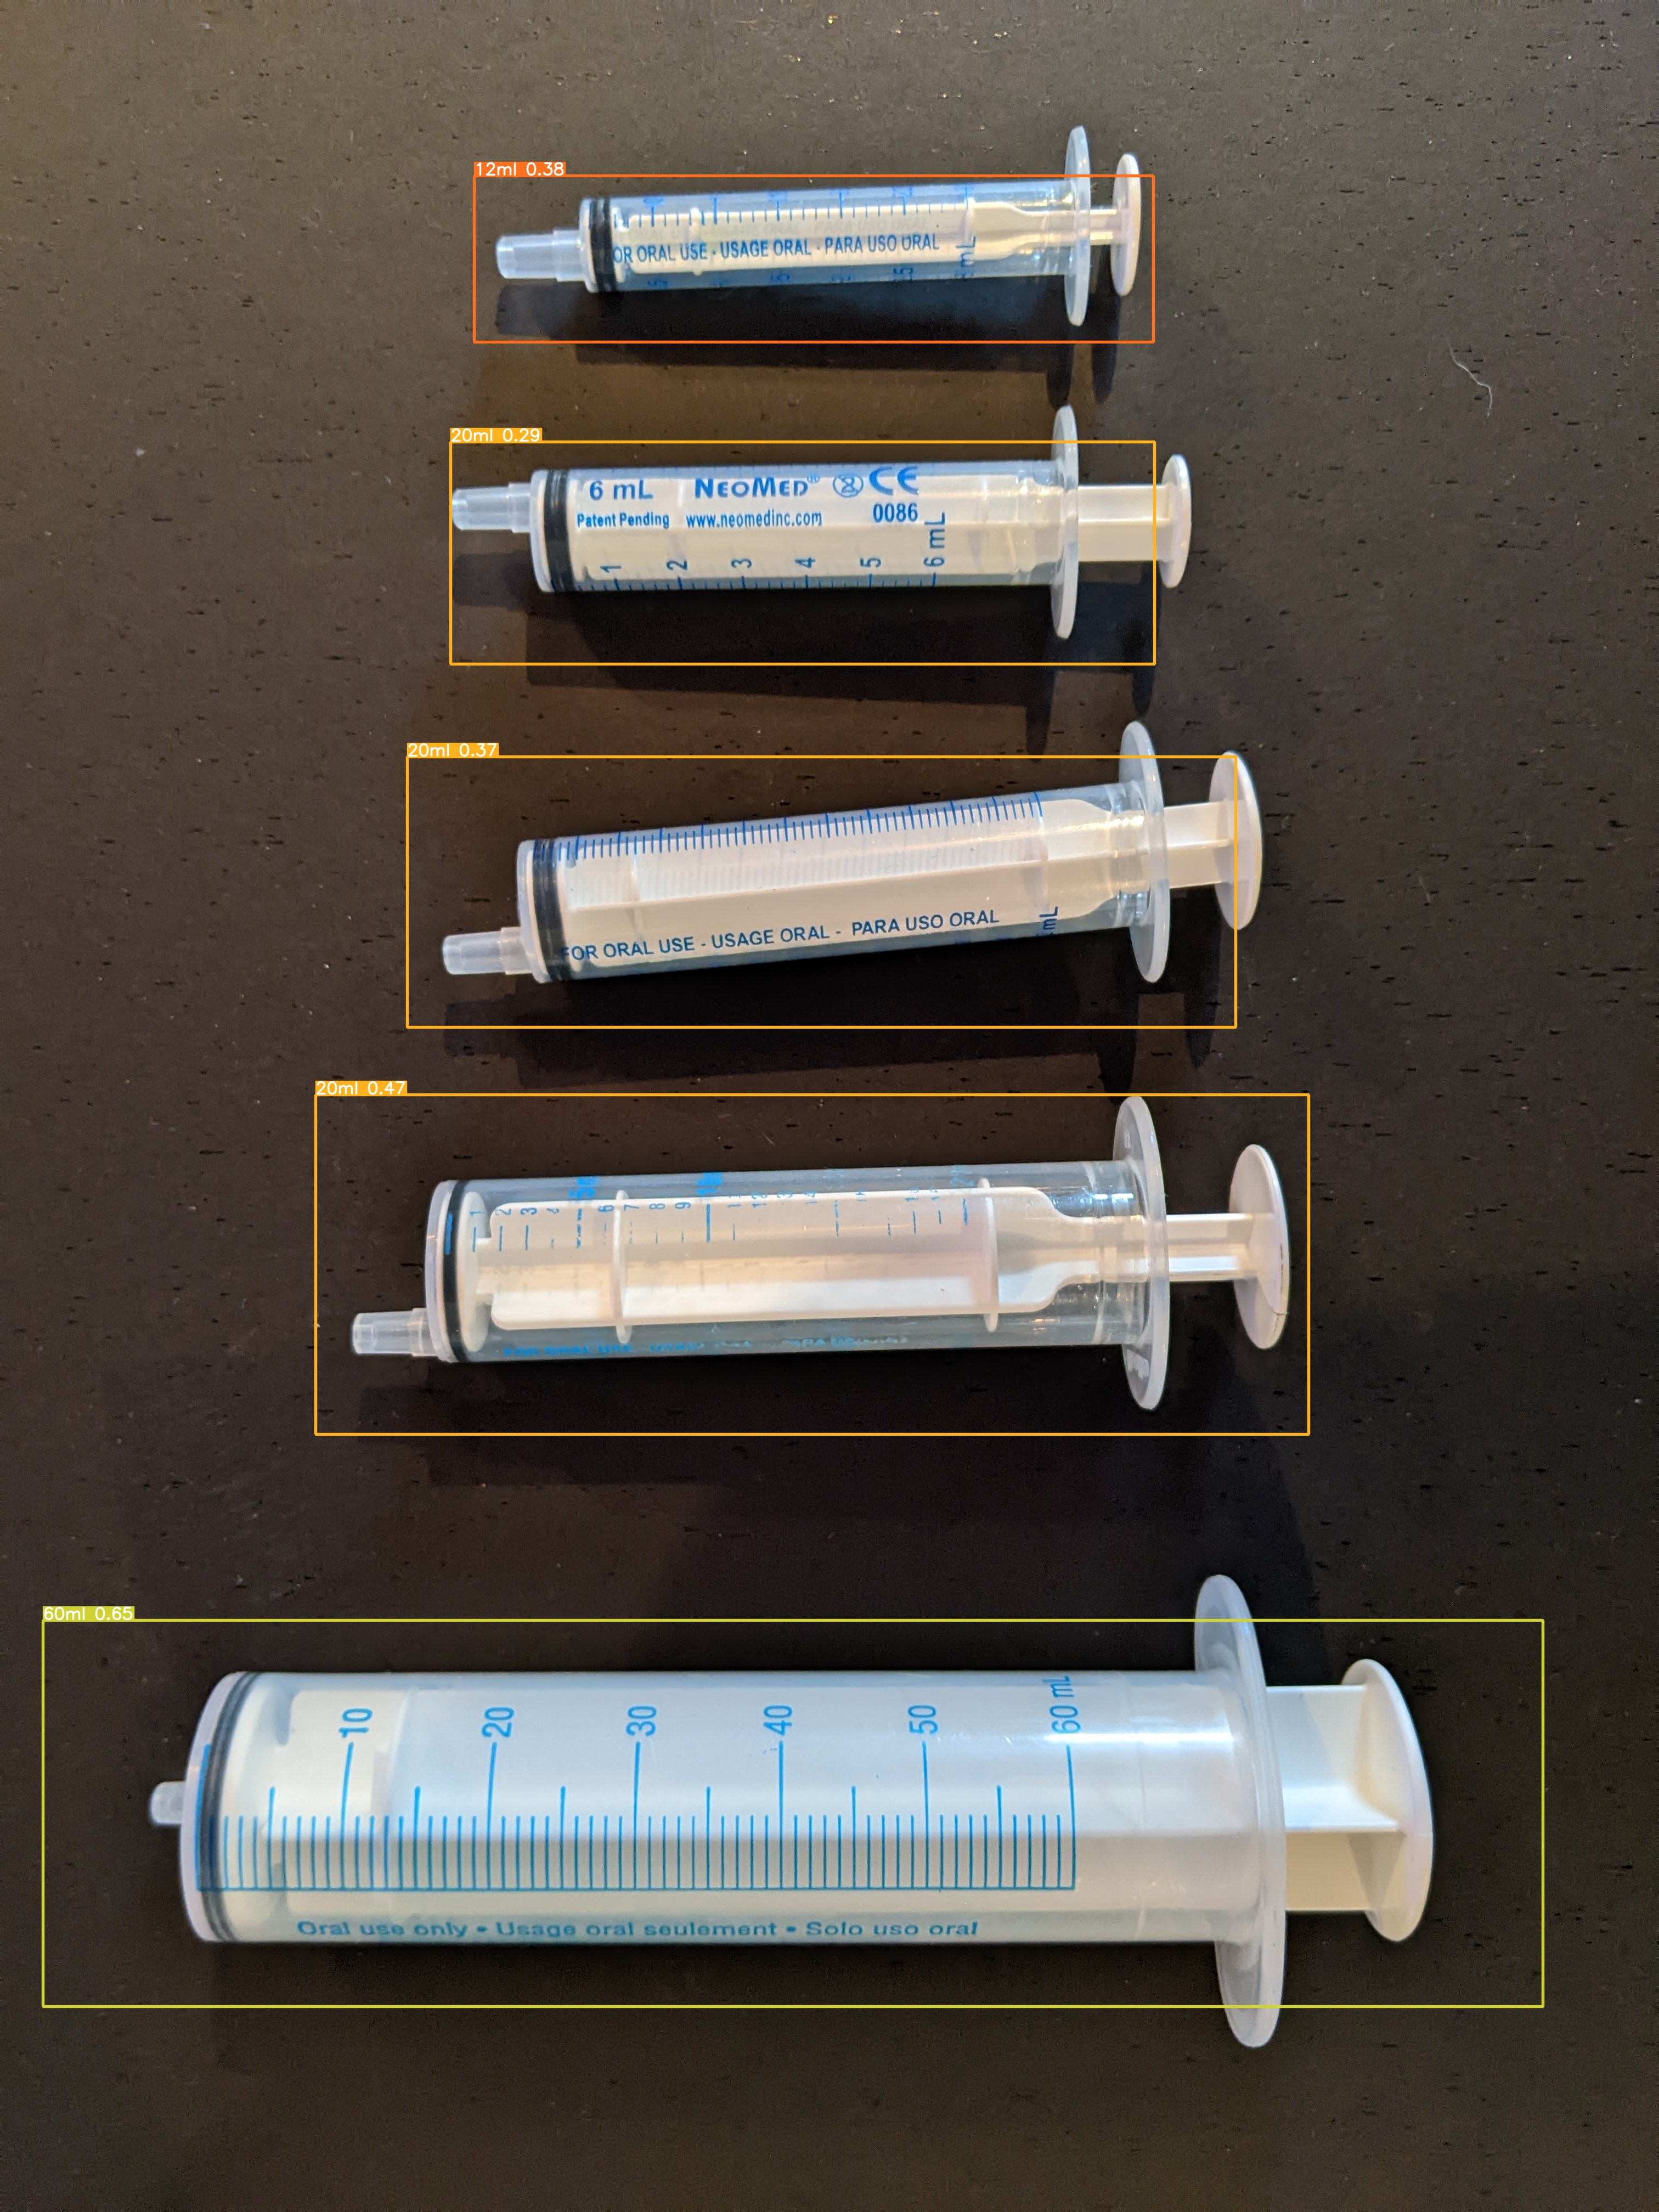

In [ ]:
Image("yolov5/runs/detect/exp2/Ensemble seringues.jpg")

In [ ]:
!zip -r yolov5.zip yolov5/

  adding: yolov5/ (stored 0%)
  adding: yolov5/.pre-commit-config.yaml (deflated 61%)
  adding: yolov5/train.py (deflated 69%)
  adding: yolov5/data/ (stored 0%)
  adding: yolov5/data/hyps/ (stored 0%)
  adding: yolov5/data/hyps/hyp.scratch-low.yaml (deflated 54%)
  adding: yolov5/data/hyps/hyp.scratch-med.yaml (deflated 53%)
  adding: yolov5/data/hyps/hyp.scratch-high.yaml (deflated 53%)
  adding: yolov5/data/hyps/hyp.VOC.yaml (deflated 48%)
  adding: yolov5/data/hyps/hyp.Objects365.yaml (deflated 40%)
  adding: yolov5/data/xView.yaml (deflated 58%)
  adding: yolov5/data/VOC.yaml (deflated 56%)
  adding: yolov5/data/Objects365.yaml (deflated 57%)
  adding: yolov5/data/scripts/ (stored 0%)
  adding: yolov5/data/scripts/download_weights.sh (deflated 37%)
  adding: yolov5/data/scripts/get_coco.sh (deflated 47%)
  adding: yolov5/data/scripts/get_coco128.sh (deflated 36%)
  adding: yolov5/data/images/ (stored 0%)
  adding: yolov5/data/images/bus.jpg (deflated 1%)
  adding: yolov5/data/imag

In [ ]:
from google.colab import files
files.download("yolov5.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Sub-Box Classification

## RESNET50

In [ ]:
!pip install keras

In [ ]:
!unzip drive/MyDrive/box-cropped.zip

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.layers import Dense,Flatten
from keras.models import Sequential
import keras.optimizers as opt

import pathlib



data_dir = "box-cropped/"
class_names = ['12ml','20ml','3ml','60ml','6ml']
img_height,img_width=256,256
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.4,
  subset="training",
  seed=123,
  label_mode='categorical',
  image_size=(img_height, img_width),
  batch_size=batch_size)


val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  label_mode="categorical",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


import matplotlib.pyplot as plt


resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(img_width,img_height,3),
                   pooling='avg',classes=5,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)

resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(5, activation='softmax'))

resnet_model.summary()

resnet_model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

history = resnet_model.fit(train_ds, validation_data=val_ds, epochs=50)



Found 38 files belonging to 5 classes.
Using 23 files for training.


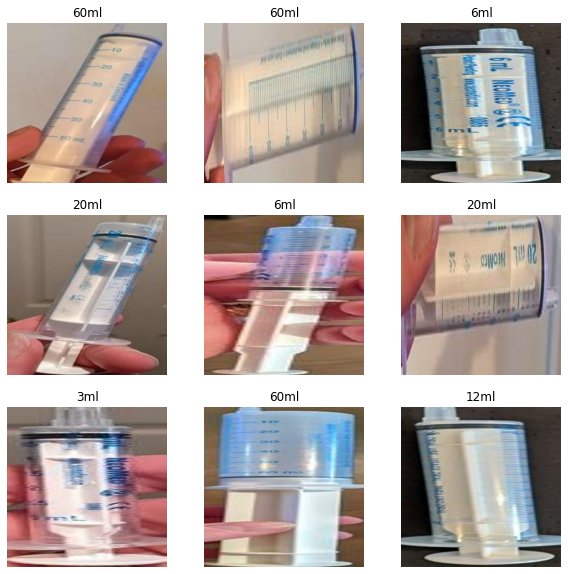

In [ ]:
data_dir = "box-cropped/"
class_names = ['12ml','20ml','3ml','60ml','6ml']
img_height,img_width=256,256
batch_size=32
show = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.4,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


plt.figure(figsize=(10, 10))
for images, labels in show.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

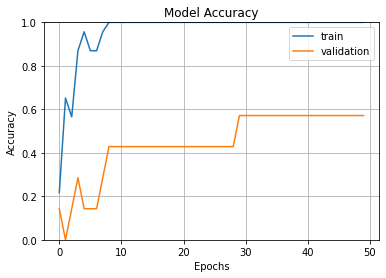

In [ ]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
import cv2
image=cv2.imread(str(roses[0]))
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)

pred=resnet_model.predict(image)

In [ ]:
output_class=class_names[np.argmax(pred)]
print("The predicted class is", output_class)

## RESNET101


In [ ]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet101(include_top=False,
                   input_shape=(img_width,img_height,3),
                   pooling='avg',classes=5,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)

resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(5, activation='softmax'))

resnet_model.summary()

resnet_model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

history = resnet_model.fit(train_ds, validation_data=val_ds, epochs=50)

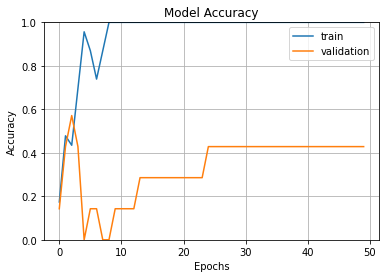

In [ ]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

## mobileNetV2


In [ ]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.MobileNetV2(include_top=False,
                   input_shape=(img_width,img_height,3),
                   pooling='avg',classes=5,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)

resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(5, activation='softmax'))

resnet_model.summary()

resnet_model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

history = resnet_model.fit(train_ds, validation_data=val_ds, epochs=50)

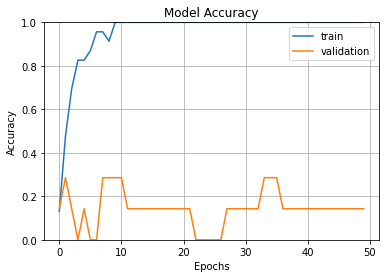

In [ ]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

## DenseNet121


In [ ]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.DenseNet121(include_top=False,
                   input_shape=(img_width,img_height,3),
                   pooling='avg',classes=5,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)

resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(5, activation='softmax'))

resnet_model.summary()

resnet_model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

history = resnet_model.fit(train_ds, validation_data=val_ds, epochs=50)

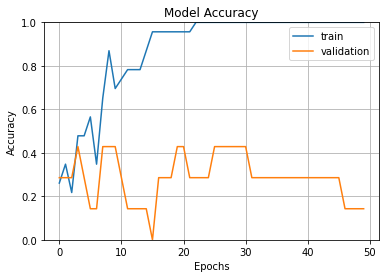

In [ ]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

## VGG 16


In [ ]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.VGG16(include_top=False,
                   input_shape=(img_width,img_height,3),
                   pooling='avg',classes=5,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)

resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(5, activation='softmax'))

resnet_model.summary()

resnet_model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

history = resnet_model.fit(train_ds, validation_data=val_ds, epochs=50)

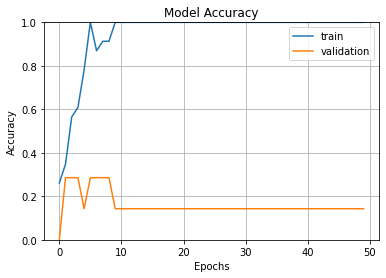

In [ ]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

## RESNET 152 V2


In [ ]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet152V2(include_top=False,
                   input_shape=(img_width,img_height,3),
                   pooling='avg',classes=5,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)

resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(5, activation='softmax'))

resnet_model.summary()

resnet_model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

history = resnet_model.fit(train_ds, validation_data=val_ds, epochs=50)

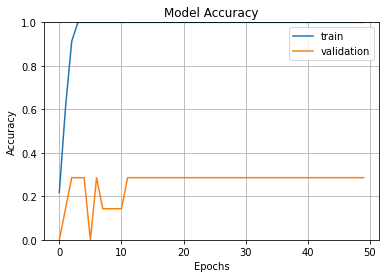

In [ ]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()